In [63]:
def load_clinical_eeg_data(datapath, sub):
    # input arguments:
    # datapath (string): path to the root directory
    # sub (string): subject ID (e.g. chb01, chb02, etc)
    
    # output:
    # eegdata (numpy array): samples x channels data matrix
    # eegevents (pandas dataframe): labels and chunks
    # channel_names (list): names of the channels
    import pandas as pd
    alldata = pd.read_csv(os.path.join(datapath, sub + '.csv')) #removed 'train' bc of how I saved
    alldata.rename(columns={'Unnamed: 0': 'Index'})
    eegevents = alldata[['labels', 'chunks']]
    alldata.drop(['Unnamed: 0', 'labels', 'chunks'], axis=1, inplace=True)
    names = alldata.keys()
    return alldata.iloc[:].as_matrix(), eegevents, names




In [64]:
# In[3]:

import os
#Appropriate dir

os.chdir("/Users/leilasolouki/Desktop/train")
path = os.getcwd()

#Get subject names from appropriate dir, -4 for .csv suffux
subjects = [f[:-4] for f in os.listdir(path)]

data, label_chunk, nodes = load_clinical_eeg_data(path,subjects[3])





In [65]:
# converting labels and chunks from pandas dataframe to numpy array. isolating the labels
labels_and_chunks=label_chunk.as_matrix()
labels=labels_and_chunks[:,0]
print type(labels)
print labels
print labels.shape

<type 'numpy.ndarray'>
[ 0.  0.  0. ...,  0.  0.  0.]
(323712,)


(323712,)


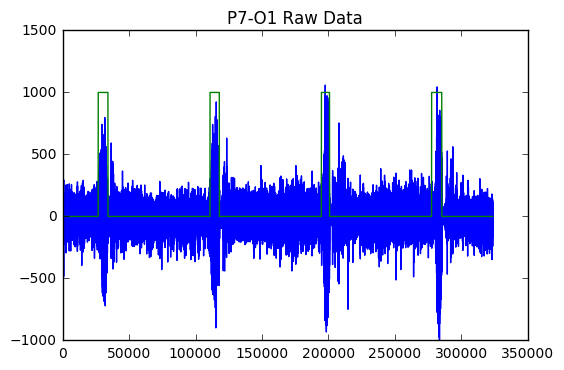

In [66]:
# In[23]:

#Visualize Raw Data
import matplotlib.pyplot as plt

#Make exagerrated labels
y = [i*1000 for i in labels]
#Random Node choice
x = data[:,3]
print x.shape
time = [i for i in range(len(x))]
plt.plot(time,x)
plt.plot(time,y)
plt.title(nodes[3] + " Raw Data")
plt.show()







3


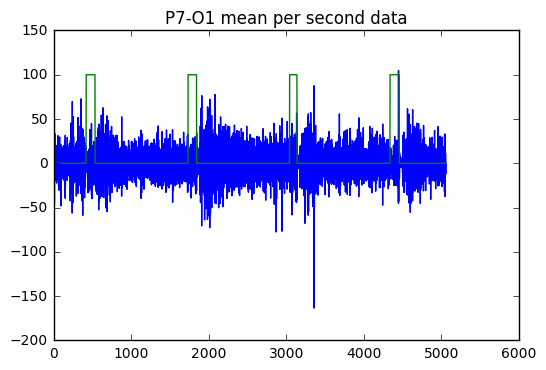

In [67]:
#taking the mean of each second
import numpy as np

def take_mean_every_64_points(x):
    i=0; 
    mean_array=[]
    while(i<(x.shape[0])):
        array=x[i:i+65]
        mean_array.append(np.mean(array))
        i+=64
    mean_array=np.array(mean_array)
    return mean_array
def take_max_every_64_points(x):
    i=0; 
    mean_array=[]
    while(i<(x.shape[0])):
        array=x[i:i+65]
        mean_array.append(np.max(array))
        i+=64
    mean_array=np.array(mean_array)
    return mean_array

mean_x=take_mean_every_64_points(x)
mean_labels=take_mean_every_64_points(labels)

test = [i for i in range(64*3)]
print take_mean_every_64_points(np.array(test)).shape[0]
plt.plot(time[:mean_x.shape[0]],mean_x)
plt.title(nodes[3] + " mean per second data")
plt.plot(time[:mean_x.shape[0]], mean_labels*100)
plt.show()





In [68]:
#go through each coloumn to take the max freq of each second 
#makes a 5058 by 23 array: 5058 seconds and 23 different nodes
dataset=np.apply_along_axis(take_max_every_64_points, 0,data)
print dataset.shape

(5058, 23)


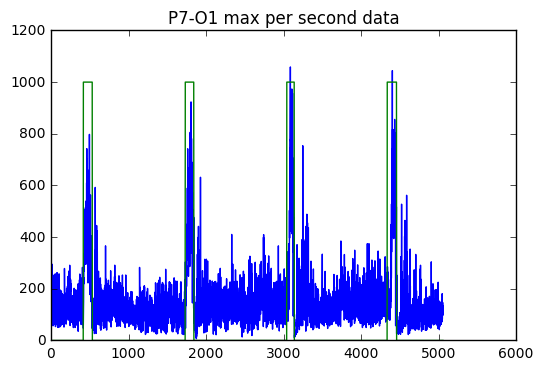

[]

In [69]:
max_freq_x=take_max_every_64_points(x)
max_labels=take_max_every_64_points(labels)
plt.plot(time[:max_freq_x.shape[0]],max_freq_x)
plt.title(nodes[3] + " max per second data")
plt.plot(time[:max_freq_x.shape[0]], max_labels*1000)
plt.show()
plt.plot()



In [70]:
#do we need to shuffle the data? what part do we make the training and testing set 
#80 percent of the total chunks

training_set=dataset[0:4047]
testing_set=dataset[4047:]

In [71]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(training_set,max_labels[0:4047])
# model.fit()  # this can be modified if you used different variables
print "Training accuracy:" + str(model1.score(dataset,max_labels))

Training accuracy:0.975484381178


In [72]:
model1.score(testing_set, max_labels[4047:])
print"Testing accuracey"+ str(model1.score(testing_set,max_labels[4047:]))

Testing accuracey0.946587537092


In [79]:
data4, label_chunk4, nodes4 = load_clinical_eeg_data(path,'chb05')

In [81]:
print data4.shape
labels_and_chunks4=label_chunk.as_matrix()

print labels_and_chunks4.shape
print labels_and_chunks4

labels4=labels_and_chunks[:,0]


print labels4.shape

dataset4=np.apply_along_axis(take_max_every_64_points,0,data4)

max_labels4=take_max_every_64_points(labels4)
print dataset4.shape
print max_labels4.shape


model1.score(dataset4, max_labels4)
#print "Testing accuracy:" + str(model1.score(dataset4,max_labels4))


(323712, 23)
(323712, 2)
[[  0.   6.]
 [  0.   6.]
 [  0.   6.]
 ..., 
 [  0.  17.]
 [  0.  17.]
 [  0.  17.]]
(323712,)
(5058, 23)
(5058,)
Testing accuracy:0.975484381178


In [83]:
#doesnt work because patient 20 has 28 features rather than 23. We trained it on 23 features. 


data20, label_chunk20, nodes20 = load_clinical_eeg_data(path,'chb20')

In [84]:
print data20.shape
labels_and_chunks20=label_chunk.as_matrix()

print labels_and_chunks20.shape
print labels_and_chunks20

labels20=labels_and_chunks[:,0]


print labels20.shape

dataset20=np.apply_along_axis(take_max_every_64_points,0,data20)

max_labels20=take_max_every_64_points(labels20)
print dataset20.shape
print max_labels20.shape


model1.score(dataset20, max_labels20)
print "Testing accuracy:" + str(model1.score(dataset4,max_labels20))

(497088, 28)
(323712, 2)
[[  0.   6.]
 [  0.   6.]
 [  0.   6.]
 ..., 
 [  0.  17.]
 [  0.  17.]
 [  0.  17.]]
(323712,)
(7767, 28)
(5058,)


ValueError: X has 28 features per sample; expecting 23